# Ingest and Structure data from impala and save it 

This notebook contains the first experiments on learning features.

It consists of joining and concatinating different learning features into one dataframe df. handling duplicates, missing values and outliers.

1. [Packages](#Packages)
1. [Loading data](#Loding-data)
2. [Sample and save data](#Sample-and-save-data)
3. [Target column](#Target-column)
4. [Train Test Split](#Train-Test-Split)

### Packages

In [1]:
import os
#Change current directory
os.chdir ('/home/hamza_hajjini@MCC.DOMAIN/bcppmchurn')
#Check the current directory
os.getcwd()

'/home/hamza_hajjini@MCC.DOMAIN/bcppmchurn'

In [81]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from datetime import datetime 
from scipy import stats
from pyspark.sql import SparkSession
from pyspark.sql import functions
import yaml 

from sklearn.model_selection import train_test_split 

from src.components.data_ingestion import get_feature_tables_from_impala, get_target_table 
from src.components.data_structuring import structuringPipeline
from src.eda import utils
from src.eda.utils import columnsFamilies

In [3]:
#Get todays's date
date_time = datetime.today().strftime("%Y-%m-%d")
#Declare paths
train_dev_test_path = "data/train_dev_test"
data_path = "data/experiments_data"
data_samples_path = "data/data_samples"
artifacts_path = "artifacts/eda"

In [4]:
#Reload modules in case a change has occured
#import importlib
#from src.components import data_ingestion, data_structuring
#importlib.reload(data_ingestion)
#importlib.reload(data_structuring)

### Loding data

--------------------

**Load data from impala**

In [5]:
domains =["data", "voice", "complaints", "payement"]
feature_types = ["stat", "trend"]
dn_group_interval = ["00", "58"]
#Initiate a spark session and get table features 
features_dict = get_feature_tables_from_impala(domains, feature_types, dn_group_interval) 
#Get target table
churners_non_churners = get_target_table()
#Structure table featues into a dataframe
df, pivoted_df = structuringPipeline(features_dict, churners_non_churners).run_structuring_pipeline()
df.head()

Getting Kerberos ticket .............................................................................
Obtained kerberos ticket succeffully
Initiating spark session ............................................................................
Loading tel_test_dtddds.dev_bcppmchurn_learning_data_stat_features ..................................
tel_test_dtddds.dev_bcppmchurn_learning_data_stat_features shape is: (5020380, 16) ................................
Loading tel_test_dtddds.dev_bcppmchurn_learning_data_trend_features ..................................
tel_test_dtddds.dev_bcppmchurn_learning_data_trend_features shape is: (5020380, 17) ................................
Loading tel_test_dtddds.dev_bcppmchurn_learning_voice_stat_features ..................................
tel_test_dtddds.dev_bcppmchurn_learning_voice_stat_features shape is: (3391096, 16) ................................
Loading tel_test_dtddds.dev_bcppmchurn_learning_voice_trend_features ................................

,dn,gamme,churn_segment,churn_date,activation_bscs_date,id_date,complaints_complaints_complaint_status_abondon_duration_nb_1m,complaints_complaints_complaint_status_abondon_total_nb_1m,complaints_complaints_complaint_status_autre_duration_nb_1m,complaints_complaints_complaint_status_autre_total_nb_1m,...,voice_call_direction_ic_duration_value_1_3w_3_4w,voice_call_direction_oc_duration_value_1_3w_3_4w,voice_destination_type_international_duration_value_1_3w_3_4w,voice_destination_type_national_duration_value_1_3w_3_4w,voice_termination_type_offnet_duration_value_1_3w_3_4w,voice_termination_type_onnet_duration_value_1_3w_3_4w,voice_weekend_n_duration_value_1_3w_3_4w,voice_weekend_y_duration_value_1_3w_3_4w,voice_workingh_n_duration_value_1_3w_3_4w,voice_workingh_y_duration_value_1_3w_3_4w
0,212602495129,Forfaits 49 dhs,non_churners,2024-02-25,2023-01-17 21:09:34,20240607,NaN,NaN,NaN,NaN,...,1.21109,2.562370,NaN,2.539916,2.484907,2.538944,3.490659,1.080202,2.095236,3.171898
1,212698494964,Forfaits 49 dhs,non_churners,2024-09-27,2024-04-21 14:21:56,20240607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,212602646609,Forfaits 49 dhs,non_churners,2024-09-27,2024-05-09 13:08:12,20240607,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,212601341395,Forfaits 99 dhs,non_churners,2024-02-19,2022-10-03 18:50:24,20240607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,212701119852,Forfaits 49 dhs,non_churners,2024-02-12,2020-10-31 12:59:13,20240607,NaN,NaN,NaN,NaN,...,NaN,-2.735131,NaN,-2.735131,-2.772589,-2.677018,-4.262680,0.000000,-3.097515,-2.581298


**Save data**

In [40]:
#Save feature tables
features_dict["data"]["stat"].to_csv(f"{data_path}/{date_time}_data_stat_features.csv")
features_dict["data"]["trend"].to_csv(f"{data_path}/{date_time}_data_trend_features.csv")
features_dict["voice"]["stat"].to_csv(f"{data_path}/{date_time}_voice_stat_features.csv")
features_dict["voice"]["trend"].to_csv(f"{data_path}/{date_time}_voice_trend_features.csv")
features_dict["complaints"]["stat"].to_csv(f"{data_path}/{date_time}_complaints_stat_features.csv")
features_dict["complaints"]["trend"].to_csv(f"{data_path}/{date_time}_complaints_trend_features.csv")
features_dict["payement"]["stat"].to_csv(f"{data_path}/{date_time}_payement_stat_features.csv")
features_dict["payement"]["trend"].to_csv(f"{data_path}/{date_time}_payement_trend_features.csv")

In [ ]:
#Save test_samples
#df.to_csv(f"{data_path}/{date_time}_test_sample_final_df.csv", index = False)
#churners_non_churners.to_csv(f"{data_path}/{date_time}_test_sample_churners_non_churners.csv", index = False)
#features_dict["voice"]["stat"].to_csv(f"{data_path}/{date_time}_test_sample_voice_stat_features.csv", index = False)
#features_dict["voice"]["trend"].to_csv(f"{data_path}/{date_time}_test_sample_voice_trend_features.csv", index = False)

In [ ]:
#Saving a sample of final df
df.to_csv(f"{data_path}/{date_time}_final_df.csv", index = True)

In [24]:
#Save list of columns
#pd.DataFrame ({"columns": df.columns.to_list()}).to_csv(f"{artifacts_path}/{date_time}__df_columns.csv", index=False)

In [52]:
#Save churners non churners 
churners_non_churners.to_csv(f"{data_path}/{date_time}_target_table.csv")

In [100]:
#Save pivoted table which doesn't contain churn table 
pivoted_df.to_csv(f"{data_path}/{date_time}_pivoted_df.csv", index= True)

--------------

**Quick test**

In [ ]:
#Quick test 
print ( "Quick check" )
print ( f"df shape : {df.shape}" )
#print ( f"df columns : {df.columns.to_list()}" )

In [64]:
#Quick test: 
print ( f"Number of duplicate dns in df is: {df.dn.duplicated().sum()}")

Number of duplicate dns in df is: 5969


This is normal because target table contains duplicated dns 

In [105]:
#Unit test to verify if data is valid
print (f"Number of distinct dns in final df : {df.dn.nunique()} ")
print ("Should be 732044")

Number of distinct dns in final df : 732044 
Should be 732044


In [113]:
#Dinstinct dns in pivoted table 428189
pivoted_df.index.nunique()

428189

In [127]:
len (list(df.dn.unique()))

732044

In [ ]:
#See if all dns from pivoted_df exists in final df
list_of_dns_in_pivoted_df = pivoted_df.index.unique().to_list()
list_of_dns_in_df = list(df.dn.unique())
list_of_dns_in_pivoted_df_but_not_in_df = [dn for dn in list_of_dns_in_pivoted_df if dn not in list_of_dns_in_df]

### Sample and save data

In [131]:
#See churn_segments 
df["churn_segment"].value_counts()

non_churners                        493363
inactif_unknown_churners            233097
churn_operateur_actif                10602
churn_client_demande_resiliation       593
churn_operateur_inactif                299
churn_client_portaout                   59
Name: churn_segment, dtype: int64

In [132]:
df_non_churners = df[df["churn_segment"].isin(["non_churners"])].sample(n=150000, random_state=42)

In [133]:
df_inactif_churners = df[df["churn_segment"].isin(["inactif_unknown_churners"])].sample(n=140000, random_state=42)

In [134]:
df_churn_operateur_actif = df[df["churn_segment"].isin(["churn_operateur_actif"])].sample(n=10602, random_state=42)

In [135]:
df_churn_operateur_actif.to_csv(f"{data_samples_path}/{date_time}_df_churn_operateur_actif.csv", index=True)
df_inactif_churners.to_csv(f"{data_samples_path}/{date_time}_df_inactif_churners.csv", index= True)
df_non_churners.to_csv(f"{data_samples_path}/{date_time}_df_non_churnsers.csv", index= True)

In [136]:
concat_df = pd.concat ([df_non_churners, df_inactif_churners, df_churn_operateur_actif])
concat_df.shape

(300602, 3581)

In [137]:
concat_df.head()

,dn,gamme,churn_segment,churn_date,activation_bscs_date,id_date,complaints_complaints_complaint_status_abondon_duration_nb_1m,complaints_complaints_complaint_status_abondon_total_nb_1m,complaints_complaints_complaint_status_autre_duration_nb_1m,complaints_complaints_complaint_status_autre_total_nb_1m,...,voice_call_direction_ic_duration_value_1_3w_3_4w,voice_call_direction_oc_duration_value_1_3w_3_4w,voice_destination_type_international_duration_value_1_3w_3_4w,voice_destination_type_national_duration_value_1_3w_3_4w,voice_termination_type_offnet_duration_value_1_3w_3_4w,voice_termination_type_onnet_duration_value_1_3w_3_4w,voice_weekend_n_duration_value_1_3w_3_4w,voice_weekend_y_duration_value_1_3w_3_4w,voice_workingh_n_duration_value_1_3w_3_4w,voice_workingh_y_duration_value_1_3w_3_4w
86494,212720709865,Forfaits 49 dhs,non_churners,2024-03-29,2023-07-31 05:49:26,20240607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310144,212701288625,Forfaits 99 dhs,non_churners,2024-04-15,2021-06-01 20:29:48,20240607,NaN,NaN,NaN,NaN,...,NaN,0.418958,NaN,0.418958,0.265494,4.248495,2.503256,-0.126931,-1.318853,0.682406
631650,212690000398,Forfaits 49 dhs,non_churners,2024-05-25,2023-10-24 20:36:32,20240607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32049,212667252077,Forfaits 99 dhs,non_churners,2024-09-27,2024-04-05 11:33:48,20240607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407695,212640586903,Forfaits 49 dhs,non_churners,2024-09-27,2024-04-19 11:57:56,20240607,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Target column

In [138]:
#Churn segemnts and thier counts
concat_df["churn_segment"].value_counts()

non_churners                150000
inactif_unknown_churners    140000
churn_operateur_actif        10602
Name: churn_segment, dtype: int64

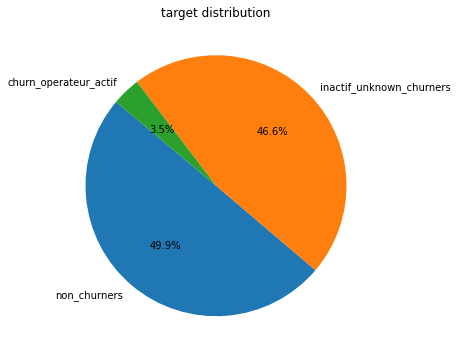

In [139]:
#Vis target distribution 
utils.vis_target_distribution(concat_df["churn_segment"])

In [140]:
#Get churn variable from churn segment 
concat_df_v2 = utils.get_churn_target_from_churn_segment(concat_df)
concat_df_v2["churn"].value_counts()

1    150602
0    150000
Name: churn, dtype: int64

### Train Test Split 

In [141]:
#Split df into train dev and test data
df_train, df_dev = train_test_split(concat_df_v2, train_size = 0.499, random_state = 42, shuffle = True, stratify = concat_df_v2["churn"] )
df_dev, df_test  = train_test_split(df_dev, train_size = 0.5, random_state = 42, shuffle = True, stratify = df_dev["churn"])
df_dev = df_dev.sample(n=25000, random_state=42)
df_test = df_test.sample(n=10000, random_state=42)
print (f"df_train shape :{df_train.shape}")
print (f"df_dev shape: {df_dev.shape}")
print (f"df_test shape: {df_test.shape}")

df_train shape :(150000, 3582)
df_dev shape: (25000, 3582)
df_test shape: (10000, 3582)


In [142]:
#Save train test data
df_train.to_csv(f"{train_dev_test_path}/{date_time}_df_train.csv", index=True)
df_dev.to_csv(f"{train_dev_test_path}/{date_time}_df_dev.csv", index=True)
df_test.to_csv(f"{train_dev_test_path}/{date_time}_df_test.csv", index=True)

In [ ]:
df_train.head()